<a href="https://colab.research.google.com/github/DACG300/Regression-Machine-Learning/blob/main/Polynomial_Regression_The_Only_Introduction_You%E2%80%99ll_Need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression: The Only Introduction You’ll Need

**Alunmo:** David Alexander Cervantes Garcia

**Materia:** Machine Learnig

**Docente:** Jose Antonia Aviña

# 2.1 Fundamentos de la técnica

La regresión polinomial es un análisis de regresión en la que la relación entre la variable independiente (x) y la variable dependiente (y) que esta modelado como un polinomio de grado en x (constant, Linear, Quadratic, Cubic, Quartic, Quintic).

Esta regresión polinomial ajusta un modelo no lineal a los datos para capturar curvaturas en los datos, lo que la hace útil para patrones complejos que no pueden ser representados por una línea recta.

Para elegir una regresión Polinomial se tiene que tener en cuenta que se espera una relación curvilínea, o que estas se muestren visualmente una forma curvilínea, o lo mas importante que los residuos del modelo lineal sean altos y el R² es bajo, indicando que una curva describe mejor la relación.

Sin embargo, al aumentar el grado del polinomio, el modelo puede ajustarse demasiado a los datos de entrenamiento, lo que genera sobreajuste y reduce la capacidad de generalización.

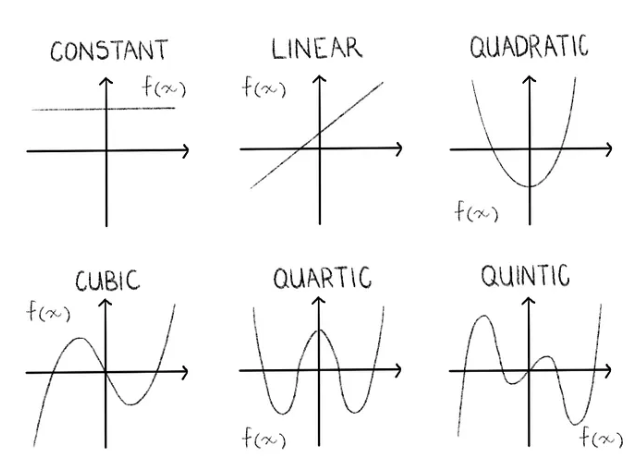

# 2.3  Descripción de la librería, clases, funciones y su parámetros  (python) empleadas en cada código


In [259]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Pandas — Para crear un marco de datos

Numpy — Para hacer informática científica

Matplotlib (pyplot y rcParams) — Para crear nuestras visualizaciones de datos

Skikit-Learn (LinearRegression, train_test_split y PolynomialFeatures) — Para realizar aprendizaje automático



**Se usa las variables X y Y para representar los dias y casos del COVID-19**


In [260]:
datos = pd.read_csv('china_cases.csv')
x = datos['x'].values
y = datos['y'].values

Panda se usa para leer los valores dentro X y Y para producir una matriz


[1 2 3 4 5 ...]

[597793149131...]

Se muestra de esta manera al leer los datos

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

divide los datos de x e y en dos conjuntos:

Entrenamiento — se usa para ajustar el modelo.

Prueba — se usa para evaluar qué tan bien generaliza el modelo a datos nuevos.

test_size=0.2 indica que el 20% de los datos se asignan al conjunto de prueba.

random_state=42 fija la semilla aleatoria para que la división sea reproducible; cada vez que ejecutes el código obtendrás los mismos conjuntos.

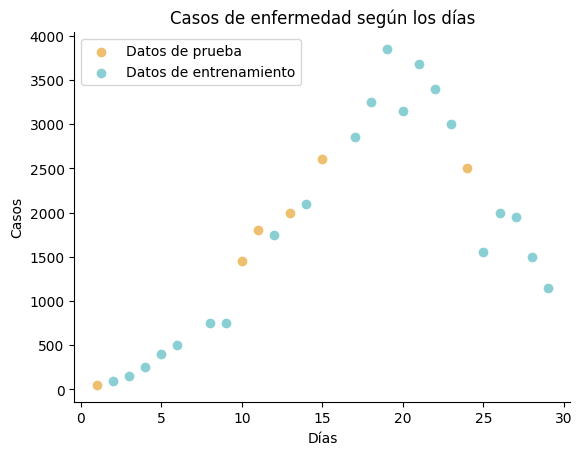

In [262]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Graficar
plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.legend(loc="upper left")
plt.title("Casos de enfermedad según los días")
plt.xlabel("Días")
plt.ylabel("Casos")
plt.show()


sirve para explorar visualmente los datos y ver si:

Los puntos de entrenamiento y prueba están bien distribuidos.

Se observa algún patrón que indique si un modelo lineal o polinomial podría ajustarse mejor.


In [263]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

Sirve para asegura que los datos tengan la forma adecuada para ser interpretados como una tabla de observaciones (filas) con variables (columnas).

Ya que anteriormente lee los datos como:

Array 1D es como una fila de valores.

Y ahora los lee de manera de:

Un array 2D (una matriz) es como una tabla con filas y columnas.

[[22]

 [1]

 [27]

 [14]

 [16]

  ...]

In [264]:
y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]


x_train[:, 0]: selecciona la primera (y única) columna de x_train, que contiene los valores de los días.

.argsort(): devuelve los índices que ordenarían esos valores de menor a mayor.

x_train[...] y y_train[...]: reordenan ambos arreglos usando esos índices, asegurando que cada valor de x_train siga emparejado con su correspondiente y_train.

**Esto garantiza que la curva se trace de forma continua y coherente, sin saltos visuales.**


In [265]:
poli = PolynomialFeatures(degree=2)

ajustamos de forma manual el grado de la regresion polinomial (grado 2) y modifica los datos para ajustarlo a dicho grado ([x], se transforman en [1, x, x²] para cada valor.)

Una constante (1) para el término independiente

El valor original (x)

Su cuadrado (x²)

In [266]:
x_poly = poli.fit_transform(x_train.reshape(-1, 1))

Convierte x_train en una matriz de una columna → x_train.reshape(-1, 1) transforma el arreglo plano en una matriz vertical (necesaria para el modelo).

Genera las características polinómicas → poli.fit_transform(...) aplica la transformación polinomial de grado 2 (definida previamente con PolynomialFeatures(degree=2)).

[[1, 1, 1**2],               ---        [[1, 1, 1],

 [1, 2, 2**2],               ---        [1, 2, 4],

 [1, 3, 3**2]]               ---           [1, 3, 9]]

1: el término constante (bias)

x: el valor original

x²: el cuadrado del valor


In [267]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train)

LinearRegression()

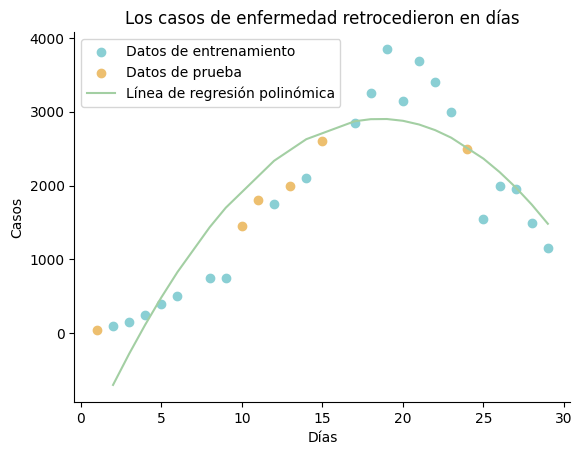

In [268]:
plt.title('Los casos de enfermedad retrocedieron en días')
plt.xlabel('Días')
plt.ylabel('Casos')

plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')
plt.plot(x_train, poly_reg.predict(poli.fit_transform(x_train.reshape(-1, 1))), c='#a3cfa3', label='Línea de regresión polinómica')
plt.legend(loc='upper left')

plt.show()

Muestra como queda la linea deacuerdo al ajuste manual de la Regresion (Grado 2)

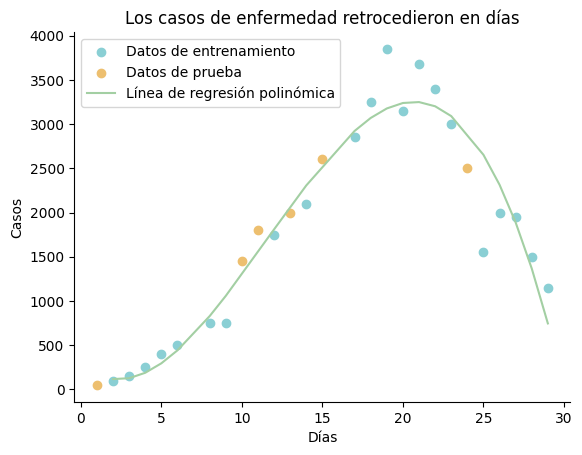

In [269]:
  poli = PolynomialFeatures(degree=3)
  x_poly_grado3 = poli.fit_transform(x_train.reshape(-1, 1))
  poly_reg.fit(x_poly_grado3, y_train)



  plt.title('Los casos de enfermedad retrocedieron en días')
  plt.xlabel('Días')
  plt.ylabel('Casos')

  plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
  plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')

  plt.plot(x_train, poly_reg.predict(poli.transform(x_train.reshape(-1, 1))), c='#a3cfa3', label='Línea de regresión polinómica')
  plt.legend(loc='upper left')
  plt.show()

In [272]:
print(poly_reg.score(x_poly_grado3, y_train))


0.9235325321974521


Finalmente muestra el R2 y lo que pasa cuando modificamos el grado de la Regresion Polinomial